<a href="https://colab.research.google.com/github/amnaahmad20/Smart-weather-monitoring-system/blob/main/Smart_weather_monitoring_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Smart weather monitoring system



*   Lamees 347289
*   Amna Ahmad 335246
*   Fatima Hussain 350328
*   Ayesha Shamim Naime 356760
*   Muhammad Abdullah Khan Abbasi 339550







#Acquire Dataset - World Weather Repository form kaggle

In [68]:
# kaggle api
!mkdir -p /root/.kaggle
!mv /content/kaggle.json /root/.kaggle/

mv: cannot stat '/content/kaggle.json': No such file or directory


In [69]:
# download data from kaggle
!kaggle datasets download -d nelgiriyewithana/global-weather-repository

global-weather-repository.zip: Skipping, found more recently modified local copy (use --force to force download)


In [70]:
!unzip /content/global-weather-repository.zip

Archive:  /content/global-weather-repository.zip
replace GlobalWeatherRepository.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: GlobalWeatherRepository.csv  


In [71]:
# imports
import pandas as pd
import numpy as np

In [112]:
# read csv
df = pd.read_csv("/content/GlobalWeatherRepository.csv")

In [73]:
# first view of data
df

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22994,Venezuela,Caracas,10.50,-66.92,America/Caracas,1703873700,2023-12-29 14:15,34.0,93.2,Partly cloudy,...,6.7,9.8,1,1,06:44 AM,06:15 PM,08:44 PM,08:55 AM,Waning Gibbous,96
22995,Vietnam,Hanoi,21.03,105.85,Asia/Bangkok,1703873700,2023-12-30 01:15,21.0,69.8,Mist,...,376.1,417.7,6,10,06:32 AM,05:25 PM,07:28 PM,08:23 AM,Waning Gibbous,96
22996,Yemen,Sanaa,15.35,44.21,Asia/Aden,1703873700,2023-12-29 21:15,16.2,61.1,Patchy rain possible,...,13.6,41.0,1,2,06:28 AM,05:42 PM,07:55 PM,08:26 AM,Waning Gibbous,96
22997,Zambia,Lusaka,-15.42,28.28,Africa/Lusaka,1703873700,2023-12-29 20:15,19.7,67.5,Partly cloudy,...,23.8,37.0,2,2,05:38 AM,06:40 PM,08:55 PM,07:33 AM,Waning Gibbous,96


#Data Insights

In [226]:
# get data columns, types and number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22999 entries, 0 to 22998
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       22999 non-null  object 
 1   location_name                 22999 non-null  object 
 2   latitude                      22999 non-null  float64
 3   longitude                     22999 non-null  float64
 4   timezone                      22999 non-null  object 
 5   last_updated_epoch            22999 non-null  int64  
 6   last_updated                  22999 non-null  object 
 7   temperature_celsius           22999 non-null  float64
 8   temperature_fahrenheit        22999 non-null  float64
 9   condition_text                22999 non-null  object 
 10  wind_mph                      22999 non-null  float64
 11  wind_kph                      22999 non-null  float64
 12  wind_degree                   22999 non-null  int64  
 13  w

In [227]:
# null values
df.isna().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [228]:
# columns
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [229]:
# get islamabad rows
islamabad = df[df['location_name']=="Islamabad"]

In [230]:
# remove the columns that dont adhere to our project
columns_to_keep = ['temperature_celsius', 'condition_text', 'wind_kph', 'precip_mm', 'gust_kph',
                   'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
                   'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
                   'air_quality_us-epa-index', 'air_quality_gb-defra-index']

In [231]:
islamabad = islamabad[columns_to_keep]
islamabad.shape

(118, 13)

In [232]:
islamabad

,temperature_celsius,condition_text,wind_kph,precip_mm,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index
131,31.9,Sunny,5.8,0.0,6.5,1442.0,277.5,31.9,6.1,88.4,94.5,4,10
326,25.7,Sunny,7.6,0.0,11.9,647.5,98.7,8.7,5.1,46.3,53.2,3,5
521,25.7,Clear,10.1,0.0,20.9,867.8,47.2,15.1,5.8,51.5,64.7,3,6
716,26.3,Clear,4.3,0.0,7.9,814.4,52.2,13.2,3.0,75.2,118.2,4,10
911,26.6,Clear,8.6,0.0,15.5,881.2,34.7,16.3,2.1,78.5,141.7,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22155,12.2,Clear,7.9,0.0,16.6,2136.2,5.0,82.3,9.9,102.2,137.1,4,10
22350,11.9,Clear,7.6,0.0,15.9,1815.8,40.1,54.2,11.4,121.1,146.7,4,10
22545,12.4,Clear,8.3,0.0,17.4,2082.8,2.3,66.5,5.3,136.2,183.7,4,10
22740,11.4,Clear,9.7,0.0,20.4,4219.1,0.0,137.1,17.9,239.7,313.8,5,10


#Formatting Data for ThingsSpeak

<p><strong>ThingSpeak</strong> is an Internet of Things (IoT) platform that enables users to collect, analyze, and visualize data from sensors or devices in real-time. It provides a cloud-based infrastructure for managing and sharing IoT data, making it accessible for monitoring and decision-making applications.</p>


In [172]:
islamabad_thingsspeak = islamabad

In [173]:
air_quality_cols = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
                    'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
                    'air_quality_us-epa-index', 'air_quality_gb-defra-index']

# Calculate the row-wise average
islamabad_thingsspeak['average_air_quality'] = islamabad_thingsspeak[air_quality_cols].mean(axis=1, skipna=True)

# Display the DataFrame with the new column
islamabad_thingsspeak

,temperature_celsius,condition_text,wind_kph,precip_mm,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,average_air_quality
131,31.9,Sunny,5.8,0.0,6.5,1442.0,277.5,31.9,6.1,88.4,94.5,4,10,244.3000
326,25.7,Sunny,7.6,0.0,11.9,647.5,98.7,8.7,5.1,46.3,53.2,3,5,108.4375
521,25.7,Clear,10.1,0.0,20.9,867.8,47.2,15.1,5.8,51.5,64.7,3,6,132.6375
716,26.3,Clear,4.3,0.0,7.9,814.4,52.2,13.2,3.0,75.2,118.2,4,10,136.2750
911,26.6,Clear,8.6,0.0,15.5,881.2,34.7,16.3,2.1,78.5,141.7,4,10,146.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22155,12.2,Clear,7.9,0.0,16.6,2136.2,5.0,82.3,9.9,102.2,137.1,4,10,310.8375
22350,11.9,Clear,7.6,0.0,15.9,1815.8,40.1,54.2,11.4,121.1,146.7,4,10,275.4125
22545,12.4,Clear,8.3,0.0,17.4,2082.8,2.3,66.5,5.3,136.2,183.7,4,10,311.3500
22740,11.4,Clear,9.7,0.0,20.4,4219.1,0.0,137.1,17.9,239.7,313.8,5,10,617.8250


In [174]:
islamabad_thingsspeak = islamabad_thingsspeak.drop(['condition_text', 'gust_kph', 'air_quality_Carbon_Monoxide',
                                                    'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
                                                    'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
                                                    'air_quality_gb-defra-index'], axis=1)
islamabad_thingsspeak

,temperature_celsius,wind_kph,precip_mm,average_air_quality
131,31.9,5.8,0.0,244.3000
326,25.7,7.6,0.0,108.4375
521,25.7,10.1,0.0,132.6375
716,26.3,4.3,0.0,136.2750
911,26.6,8.6,0.0,146.0625
...,...,...,...,...
22155,12.2,7.9,0.0,310.8375
22350,11.9,7.6,0.0,275.4125
22545,12.4,8.3,0.0,311.3500
22740,11.4,9.7,0.0,617.8250


In [127]:
# export the datafarem to allow Visualziation on ThingsSpeak
islamabad_thingsspeak.to_csv('islamabad.csv', index=False)

#Descriptive Data Analysis

In [233]:
# get the classes
islamabad.condition_text.value_counts()

Clear                             83
Partly cloudy                     14
Patchy rain possible               8
Cloudy                             4
Overcast                           3
Sunny                              2
Light rain shower                  2
Patchy light rain with thunder     2
Name: condition_text, dtype: int64

In [234]:
# merging the classes
weather_mapping = {
    'Clear': 'Clear & Sunny',
    'Sunny': 'Clear & Sunny',
    'Partly cloudy': 'Partly Cloudy & Patchy Clouds',
    'Patchy rain possible': 'Partly Cloudy & Patchy Clouds',
    'Light rain shower': 'Partly Cloudy & Patchy Clouds',
    'Patchy light rain with thunder': 'Partly Cloudy & Patchy Clouds',
    'Cloudy': 'Cloudy & Overcast',
    'Overcast': 'Cloudy & Overcast'
}

# Create a new column 'combined_weather'
islamabad['condition_text'] = islamabad['condition_text'].map(weather_mapping)

# Display the updated DataFrame
islamabad

,temperature_celsius,condition_text,wind_kph,precip_mm,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index
131,31.9,Clear & Sunny,5.8,0.0,6.5,1442.0,277.5,31.9,6.1,88.4,94.5,4,10
326,25.7,Clear & Sunny,7.6,0.0,11.9,647.5,98.7,8.7,5.1,46.3,53.2,3,5
521,25.7,Clear & Sunny,10.1,0.0,20.9,867.8,47.2,15.1,5.8,51.5,64.7,3,6
716,26.3,Clear & Sunny,4.3,0.0,7.9,814.4,52.2,13.2,3.0,75.2,118.2,4,10
911,26.6,Clear & Sunny,8.6,0.0,15.5,881.2,34.7,16.3,2.1,78.5,141.7,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22155,12.2,Clear & Sunny,7.9,0.0,16.6,2136.2,5.0,82.3,9.9,102.2,137.1,4,10
22350,11.9,Clear & Sunny,7.6,0.0,15.9,1815.8,40.1,54.2,11.4,121.1,146.7,4,10
22545,12.4,Clear & Sunny,8.3,0.0,17.4,2082.8,2.3,66.5,5.3,136.2,183.7,4,10
22740,11.4,Clear & Sunny,9.7,0.0,20.4,4219.1,0.0,137.1,17.9,239.7,313.8,5,10


In [235]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
# Set seaborn style for better visualization
sns.set(style="whitegrid")

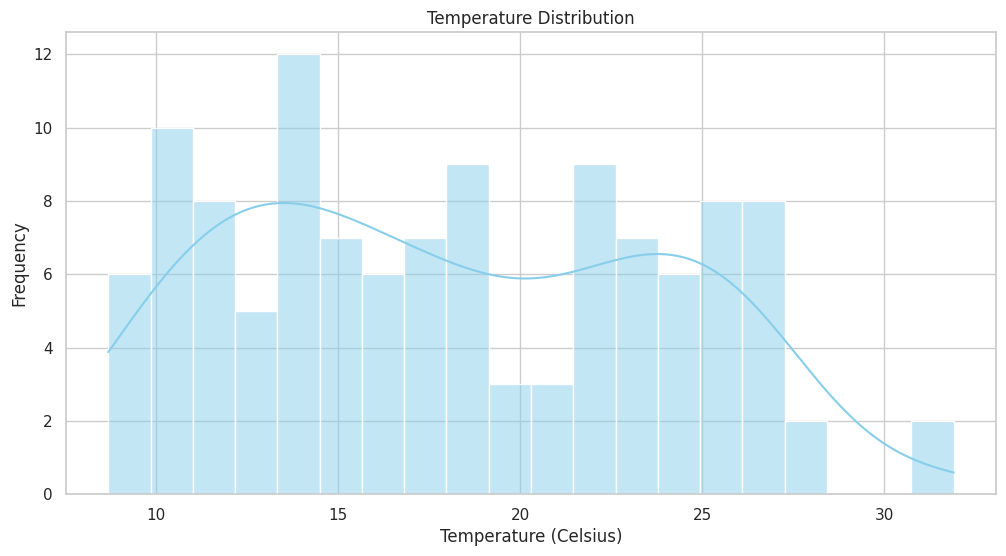

In [237]:
# Temperature Distribution
plt.figure(figsize=(12, 6))
sns.histplot(islamabad['temperature_celsius'], bins=20, kde=True, color='skyblue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()

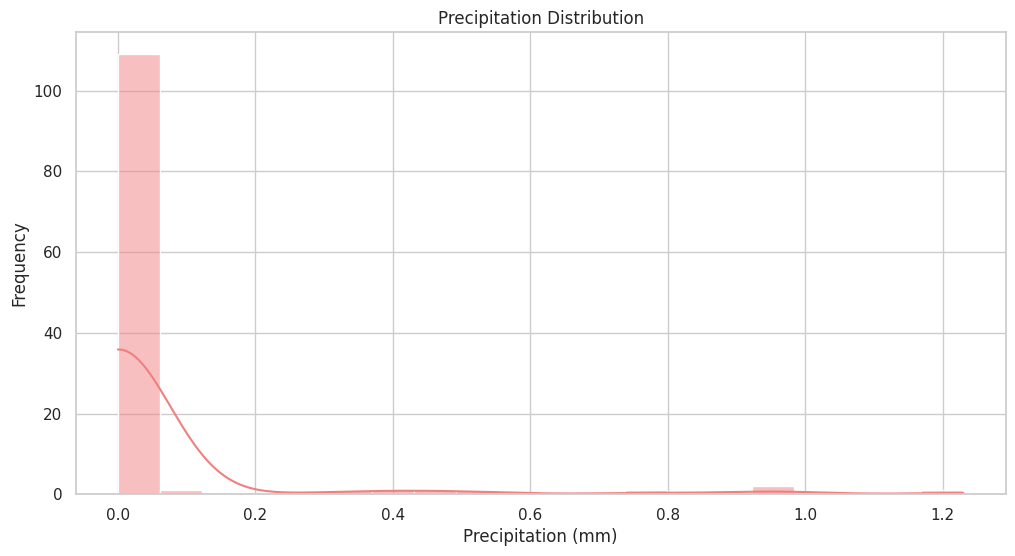

In [238]:
# Precipitation Distribution
plt.figure(figsize=(12, 6))
sns.histplot(islamabad['precip_mm'], bins=20, kde=True, color='lightcoral')
plt.title('Precipitation Distribution')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()

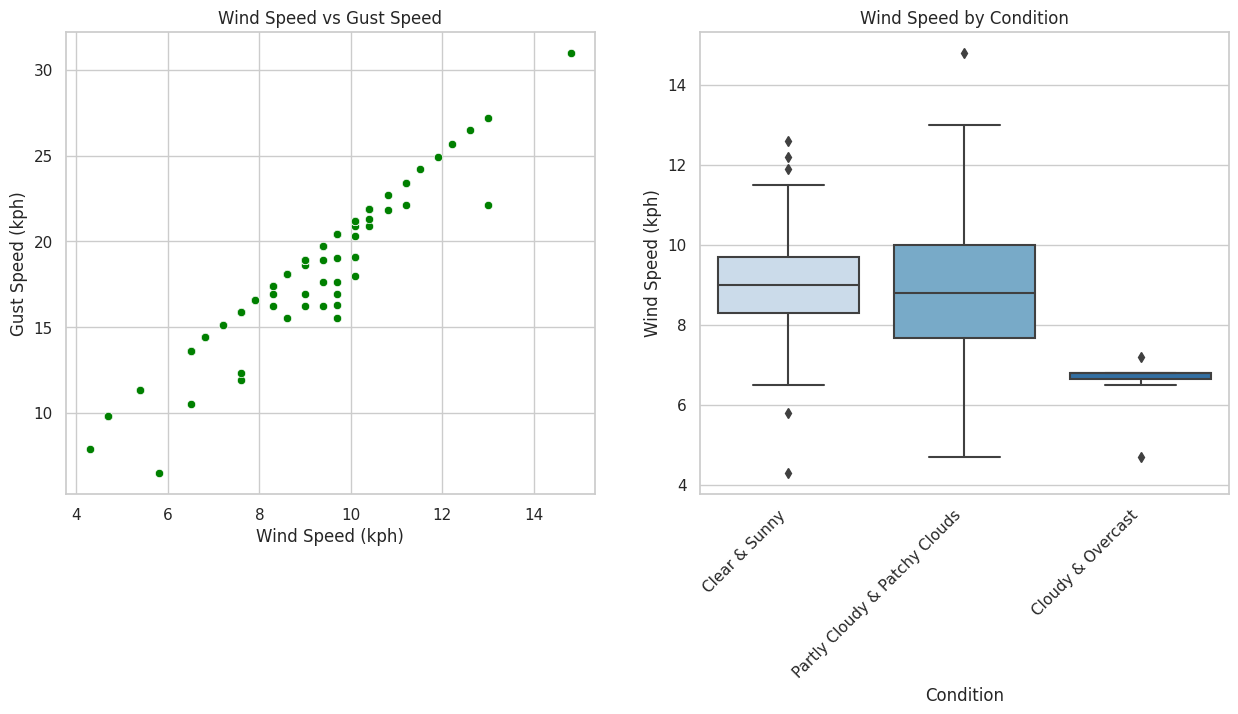

In [239]:
# Wind and Gust Visualization
plt.figure(figsize=(15, 6))

# Scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(x='wind_kph', y='gust_kph', data=islamabad, color='green')
plt.title('Wind Speed vs Gust Speed')
plt.xlabel('Wind Speed (kph)')
plt.ylabel('Gust Speed (kph)')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x='condition_text', y='wind_kph', data=islamabad, palette='Blues')
plt.title('Wind Speed by Condition')
plt.xlabel('Condition')
plt.ylabel('Wind Speed (kph)')

# Set x-label rotation angle
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle as needed
plt.show()


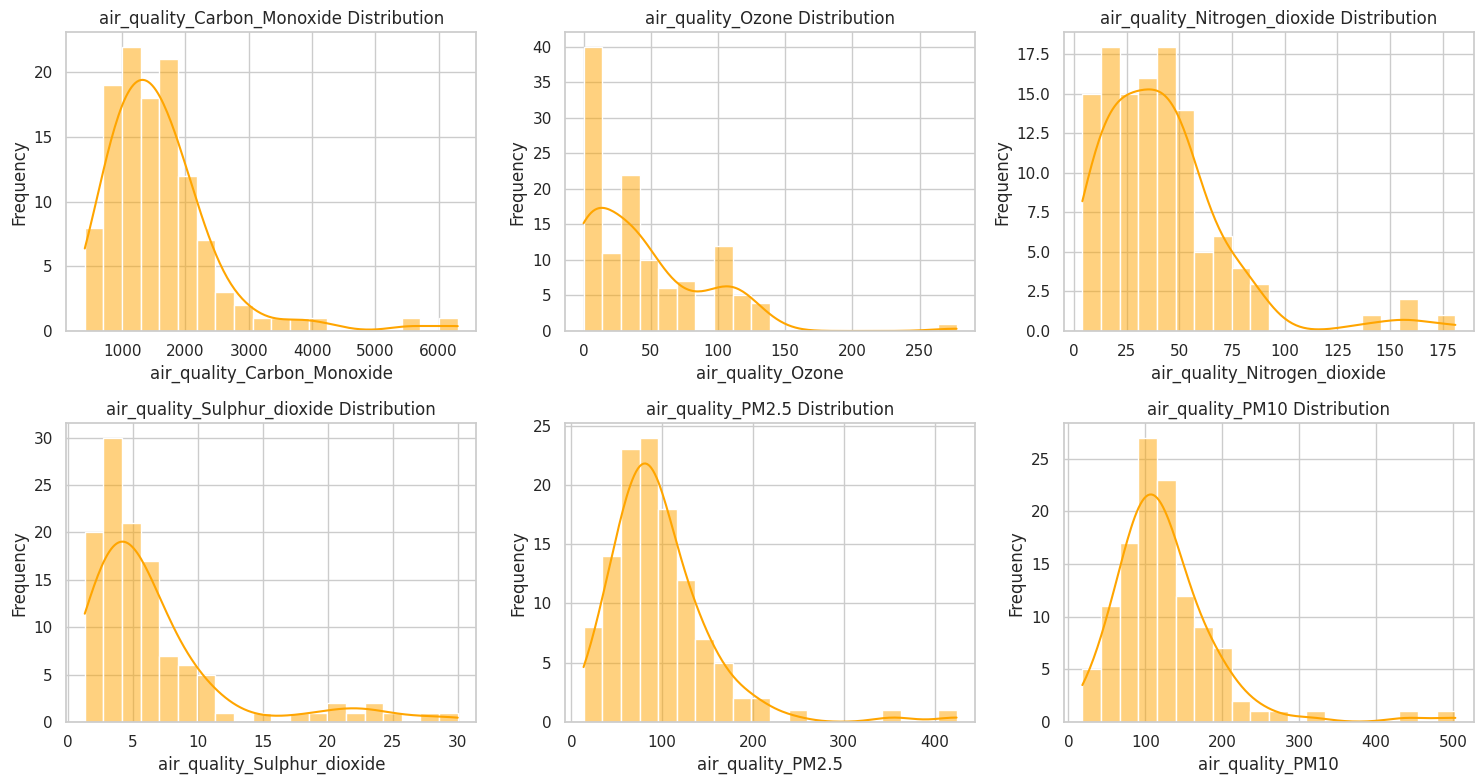

In [240]:
# Air Quality Visualization
plt.figure(figsize=(15, 8))
for i, col in enumerate(air_quality_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(islamabad[col], bins=20, kde=True, color='orange')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#Preprocessing for the model

In [241]:
islamabad

,temperature_celsius,condition_text,wind_kph,precip_mm,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index
131,31.9,Clear & Sunny,5.8,0.0,6.5,1442.0,277.5,31.9,6.1,88.4,94.5,4,10
326,25.7,Clear & Sunny,7.6,0.0,11.9,647.5,98.7,8.7,5.1,46.3,53.2,3,5
521,25.7,Clear & Sunny,10.1,0.0,20.9,867.8,47.2,15.1,5.8,51.5,64.7,3,6
716,26.3,Clear & Sunny,4.3,0.0,7.9,814.4,52.2,13.2,3.0,75.2,118.2,4,10
911,26.6,Clear & Sunny,8.6,0.0,15.5,881.2,34.7,16.3,2.1,78.5,141.7,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22155,12.2,Clear & Sunny,7.9,0.0,16.6,2136.2,5.0,82.3,9.9,102.2,137.1,4,10
22350,11.9,Clear & Sunny,7.6,0.0,15.9,1815.8,40.1,54.2,11.4,121.1,146.7,4,10
22545,12.4,Clear & Sunny,8.3,0.0,17.4,2082.8,2.3,66.5,5.3,136.2,183.7,4,10
22740,11.4,Clear & Sunny,9.7,0.0,20.4,4219.1,0.0,137.1,17.9,239.7,313.8,5,10


In [242]:
islamabad_model = islamabad

In [243]:
# averaging air quality
islamabad_model['average_air_quality'] = islamabad_model[air_quality_cols].mean(axis=1, skipna=True)

# Display the DataFrame with the new column
islamabad_model

,temperature_celsius,condition_text,wind_kph,precip_mm,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,average_air_quality
131,31.9,Clear & Sunny,5.8,0.0,6.5,1442.0,277.5,31.9,6.1,88.4,94.5,4,10,323.400000
326,25.7,Clear & Sunny,7.6,0.0,11.9,647.5,98.7,8.7,5.1,46.3,53.2,3,5,143.250000
521,25.7,Clear & Sunny,10.1,0.0,20.9,867.8,47.2,15.1,5.8,51.5,64.7,3,6,175.350000
716,26.3,Clear & Sunny,4.3,0.0,7.9,814.4,52.2,13.2,3.0,75.2,118.2,4,10,179.366667
911,26.6,Clear & Sunny,8.6,0.0,15.5,881.2,34.7,16.3,2.1,78.5,141.7,4,10,192.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22155,12.2,Clear & Sunny,7.9,0.0,16.6,2136.2,5.0,82.3,9.9,102.2,137.1,4,10,412.116667
22350,11.9,Clear & Sunny,7.6,0.0,15.9,1815.8,40.1,54.2,11.4,121.1,146.7,4,10,364.883333
22545,12.4,Clear & Sunny,8.3,0.0,17.4,2082.8,2.3,66.5,5.3,136.2,183.7,4,10,412.800000
22740,11.4,Clear & Sunny,9.7,0.0,20.4,4219.1,0.0,137.1,17.9,239.7,313.8,5,10,821.266667


In [244]:
islamabad_model = islamabad_model.drop(air_quality_cols, axis=1)

In [245]:
islamabad_model = islamabad_model.drop(['air_quality_us-epa-index', 'air_quality_gb-defra-index', 'gust_kph'], axis=1)

In [246]:
islamabad_model.describe()

,temperature_celsius,wind_kph,precip_mm,average_air_quality
count,118.000000,118.000000,118.000000,118.000000
mean,18.057627,8.814407,0.048983,317.969915
std,5.860492,1.758023,0.194001,169.003160
min,8.700000,4.300000,0.000000,88.600000
25%,13.450000,7.900000,0.000000,211.216667
50%,17.600000,9.000000,0.000000,284.991667
75%,23.150000,9.700000,0.000000,371.337500
max,31.900000,14.800000,1.230000,1235.566667


In [247]:
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named df and you want to normalize specific columns
columns_to_normalize = ['temperature_celsius', 'wind_kph', 'average_air_quality']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
islamabad_model[columns_to_normalize] = scaler.fit_transform(islamabad_model[columns_to_normalize])

# Display the updated DataFrame
islamabad_model

,temperature_celsius,condition_text,wind_kph,precip_mm,average_air_quality
131,2.372054,Clear & Sunny,-1.721969,0.0,0.032267
326,1.309611,Clear & Sunny,-0.693726,0.0,-1.038235
521,1.309611,Clear & Sunny,0.734391,0.0,-0.847488
716,1.412428,Clear & Sunny,-2.578839,0.0,-0.823620
911,1.463836,Clear & Sunny,-0.122479,0.0,-0.746073
...,...,...,...,...,...
22155,-1.003773,Clear & Sunny,-0.522352,0.0,0.559447
22350,-1.055182,Clear & Sunny,-0.693726,0.0,0.278773
22545,-0.969501,Clear & Sunny,-0.293853,0.0,0.563507
22740,-1.140863,Clear & Sunny,0.505892,0.0,2.990731


In [248]:
islamabad_model.condition_text.value_counts()

Clear & Sunny                    85
Partly Cloudy & Patchy Clouds    26
Cloudy & Overcast                 7
Name: condition_text, dtype: int64

In [250]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categories = ['Clear & Sunny', 'Partly Cloudy & Patchy Clouds', 'Cloudy & Overcast']

label_encoder.fit(categories)

# Transform the 'condition_text' column
islamabad_model['condition_text'] = label_encoder.transform(islamabad_model['condition_text'])

In [261]:
# Display the mapping between encoded values and original class labels
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:")
print(class_mapping)

Class Mapping:
{'Clear & Sunny': 0, 'Cloudy & Overcast': 1, 'Partly Cloudy & Patchy Clouds': 2}


In [251]:
islamabad_model

,temperature_celsius,condition_text,wind_kph,precip_mm,average_air_quality
131,2.372054,0,-1.721969,0.0,0.032267
326,1.309611,0,-0.693726,0.0,-1.038235
521,1.309611,0,0.734391,0.0,-0.847488
716,1.412428,0,-2.578839,0.0,-0.823620
911,1.463836,0,-0.122479,0.0,-0.746073
...,...,...,...,...,...
22155,-1.003773,0,-0.522352,0.0,0.559447
22350,-1.055182,0,-0.693726,0.0,0.278773
22545,-0.969501,0,-0.293853,0.0,0.563507
22740,-1.140863,0,0.505892,0.0,2.990731


#Predictive Analysis

In [256]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# Split the data into features (X) and target (y)
X = islamabad_model.drop(columns=['condition_text'])
y = islamabad_model['condition_text']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<dl>
  <dt>'Clear & Sunny; 0'</dt>
  
  <dt>'Cloudy & Overcast: 1'</dt>
  
  <dt>'Partly Cloudy & Patchy Clouds: 2'</dt>
</dl>


In [263]:
dst = DecisionTreeClassifier()

dst.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dst.predict(X_test)

# Display the classification report
print(f"Classification Report for Decision Tree Classifier")
print(classification_report(y_test, y_pred))
print("-" * 50)

Classification Report for Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       1.00      1.00      1.00         1
           2       0.50      0.50      0.50         4

    accuracy                           0.83        24
   macro avg       0.80      0.80      0.80        24
weighted avg       0.83      0.83      0.83        24

--------------------------------------------------


<p>Considering the classification results, the Decision Tree model exhibits suboptimal recall values, particularly for the 'Partly Cloudy & Patchy Clouds' class. This indicates a need for further improvement in the model's performance on this specific class.</p>


In [264]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(X_test)

# Display the classification report
print(f"Classification Report for Decision Tree Classifier")
print(classification_report(y_test, y_pred))
print("-" * 50)

Classification Report for Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      1.00      1.00         1
           2       1.00      0.75      0.86         4

    accuracy                           0.96        24
   macro avg       0.98      0.92      0.94        24
weighted avg       0.96      0.96      0.96        24

--------------------------------------------------
